In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset

data = pd.read_csv("train.csv")

In [3]:
data.shape

(1460, 81)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Checking the info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Checking for any missing values

missing_cols = data.columns[data.isnull().mean() > 0].to_list()

In [8]:
data[missing_cols].isnull().mean() * 100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [9]:
# Remove Alley, FireplaceQu, PoolQC, Fence, MiscFeature as there are more missing values
more_missing_values = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
missing_cols = [c for c in missing_cols if c not in more_missing_values]

In [10]:
data = data.drop(columns=more_missing_values)

In [11]:
data[missing_cols].isnull().mean() * 100

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [12]:
data[missing_cols].head()

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


In [13]:
missing_con_cols = data[missing_cols].describe().columns.to_list()
print(missing_con_cols)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [14]:
for col in missing_con_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [15]:
missing_dis_cols = [c for c in missing_cols if c not in missing_con_cols]
print(missing_dis_cols)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [16]:
for col in missing_dis_cols:
    data[col].fillna(data[col].mode().values[0], inplace=True)

In [17]:
data[missing_cols].isnull().mean()

LotFrontage     0.0
MasVnrType      0.0
MasVnrArea      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
Electrical      0.0
GarageType      0.0
GarageYrBlt     0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
dtype: float64

In [18]:
# From the below we can see that, all the missing values has been handled
len(data.columns[data.isnull().mean() > 0])

0

In [19]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [20]:
overall_qual = {
    10: "Very_Excellent_qual",  9: "Excellent_qual", 8: "Very_Good_qual", 7: "Good_qual", 6: "Above_Average_qual", 
    5: "Average_qual",  4: "Below_Average_qual", 3: "Fair_qual", 2: "Poor_qual", 1: "Very_Poor_qual"
}

overall_cond = {
    10: "Very_Excellent_cond",  9: "Excellent_cond", 8: "Very_Good_cond", 7: "Good_cond", 6: "Above_Average_cond", 
    5: "Average_cond",  4: "Below_Average_cond", 3: "Fair_cond", 2: "Poor_cond", 1: "Very_Poor_cond"
}

exter_qual = {
    "Ex": "Excellent_qual", "Gd": "Good_qual", "TA": "Average_Typical_qual", "Fa": "Fair_qual", "Po": "Poor_qual"
}

exter_cond = {
    "Ex": "Excellent_cond", "Gd": "Good_cond", "TA": "Average_Typical_cond", "Fa": "Fair_cond", "Po": "Poor_cond"
}

base_qual = {
    "Ex": "Excellent_base_qual", "Gd": "Good_base_qua", "TA": "Average_Typical_base_qua", "Fa": "Fair_base_qua", 
    "Po": "Poor_base_qua", "NA": "No_Basement_qua"
}

base_cond = {
    "Ex": "Excellent_base_cond", "Gd": "Good_base_cond", "TA": "Average_Typical_base_cond", "Fa": "Fair_base_cond", 
    "Po": "Poor_base_cond", "NA": "No_Basement_cond"
}

base_expo = {
    "Ex": "Excellent_base_expo", "Gd": "Good_base_expo", "TA": "Average_Typical_base_expo", "Fa": "Fair_base_expo", 
    "Po": "Poor_base_expo", "NA": "No_Basement_expo"
}

base_fin = {
    "GLQ": "Good_Living_Quarters", "ALQ": "Average_Living_Quarters",
    "BLQ": "Below_Average_Living_Quarters", "Rec": "Average_Rec_Room", "LwQ": "Low_Quality", "Unf": "Unfinshed",
    "NA": "No_Basement"
}

base_fin_1 = {
    "GLQ": "Good_Living_Quarters1", "ALQ": "Average_Living_Quarters1",
    "BLQ": "Below_Average_Living_Quarters1", "Rec": "Average_Rec_Room1", "LwQ": "Low_Quality1", "Unf": "Unfinshed1",
    "NA": "No_Basement1"
}

heating_quality = {
    "Ex": "Excellent_heat_qual", "Gd": "Good_heat_qual", "TA": "Average_heat_Typical_qual", "Fa": "Fair_heat_qual", 
    "Po": "Poor_heat_qual"
}

kitch_qual = {
    "Ex": "Excellent_kit_qual", "Gd": "Good_kit_qual", "TA": "Average_kit_Typical_qual", "Fa": "Fair_kit_qual", 
    "Po": "Poor_kit_qual"
}

fire_qual = {
    "Ex": "Excellent_fire_qual", "Gd": "Good_fire_qual", "TA": "Average_fire_Typical_qual", "Fa": "Fair_fire_qual", 
    "Po": "Poor_fire_qual", "NA": "No_Fireplace"
}

gar_qual = {
    "Ex": "Excellent_gar_qual", "Gd": "Good_gar_qual", "TA": "Average_gar_Typical_qual", "Fa": "Fair_gar_qual", 
    "Po": "Poor_gar_qual", "NA": "No_gar"
}

gar_cond = {
    "Ex": "Excellent_gar_cond", "Gd": "Good_gar_cond", "TA": "Average_gar_Typical_cond", "Fa": "Fair_gar_cond", 
    "Po": "Poor_gar_cond", "NA": "No_gar"
}

pool_qual = {
    "Ex": "Excellent_pool_qual", "Gd": "Good_pool_qual", "TA": "Average_Typical_pool_qual", "Fa": "Fair_pool_qual", 
    "NA": "no_pool"
}

gar_finish = {
    "Fin": "Finished", "RFn": "Rough_Finished",
    "Unf": "Unfinished", "NA": "No_gar"
}

mb_sub_class = {
    20: "1_STORY__STYLES", 
    30: "1_STORY_OLDER", 
    40: "1_STORY_ALL_AGES", 45: "1_1_2 STORY_UNFINISHED_ALL_AGES",
    50: "1_1_2_STORY_FINISHED_ALL_AGES", 60: "2_STORY_1946_NEWER",
    70: "2_STORY_1945_OLDER",
    75: "2_1_2_STORY_ALL_AGES",
    80: "SPLIT_OR_MULTI_LEVEL", 85: "SPLIT_FOYER", 90: "DUPLEX_ALL_STYLES_AND_AGES",
    120: "1_STORY_PUD_Planned_Unit_Development_1946__NEWER",
    150: "1_1_2_STORY_PUD_ALL_AGES", 160: "2_STORY_PUD_1946_NEWER",
    180: "PUD_MULTILEVEL_INCL_SPLIT_LEV_FOYER",
    190: "2_FAMILY_CONVERSION_ALL_STYLES_AND_AGES"
}
month_map = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "June", 7: "July", 8: "Aug",
                               9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}

In [21]:
data["MoSold"] = data["MoSold"].map(month_map)

In [22]:
data["MSSubClass"] = data["MSSubClass"].map(mb_sub_class)

In [23]:
lot_shape = {
    "Reg": "Regular", "IR1": "Slightly_irregular", "IR2" :"Moderately_Irregular", "IR3": "Irregular"
}

In [24]:
ordinal_vars = ["LotShape", "LandSlope", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual",
                "BsmtCond", 
                "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", 
                "GarageFinish", "GarageQual",
                "GarageCond", "PavedDrive"]

In [25]:
ordered_vars = ["Fireplaces", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "TotRmsAbvGrd", "BedroomAbvGr",
               "KitchenAbvGr", "GarageCars"]

In [26]:
year = []

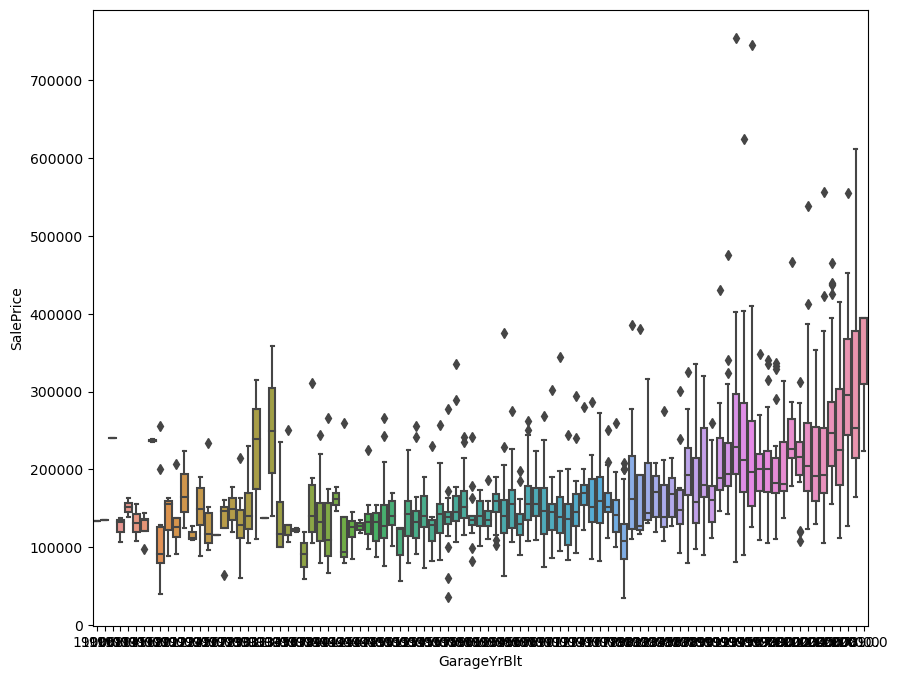

In [27]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="GarageYrBlt", y="SalePrice", data=data)
plt.show()

In [28]:
data = data.drop(columns=["Id"])

In [29]:
data["YrSold"] = data["YrSold"].map(lambda x: str(x)+"_YrSold")
data["YearBuilt"] = data["YearBuilt"].map(lambda x: str(x)+"_YearBuilt")
data["YearRemodAdd"] = data["YearRemodAdd"].map(lambda x: str(x)+"_YearRemodAdd")
data["GarageYrBlt"] = data["GarageYrBlt"].map(lambda x: str(x)+"_GarageYrBlt")

In [30]:

data_con_cols = data.describe().columns.to_list()

mis_classified_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                       'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

data_con_cols = [c for c in data_con_cols if c not in mis_classified_cols]
data_dis_cols = [c for c in data.columns if c not in data_con_cols and c not in ordinal_vars and c not in ordered_vars]

# data_dis_cols.remove('GarageYrBlt')

print(data_con_cols, " ", len(data_con_cols))
print(data_dis_cols, " ", len(data_dis_cols))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']   20
['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageYrBlt', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']   29


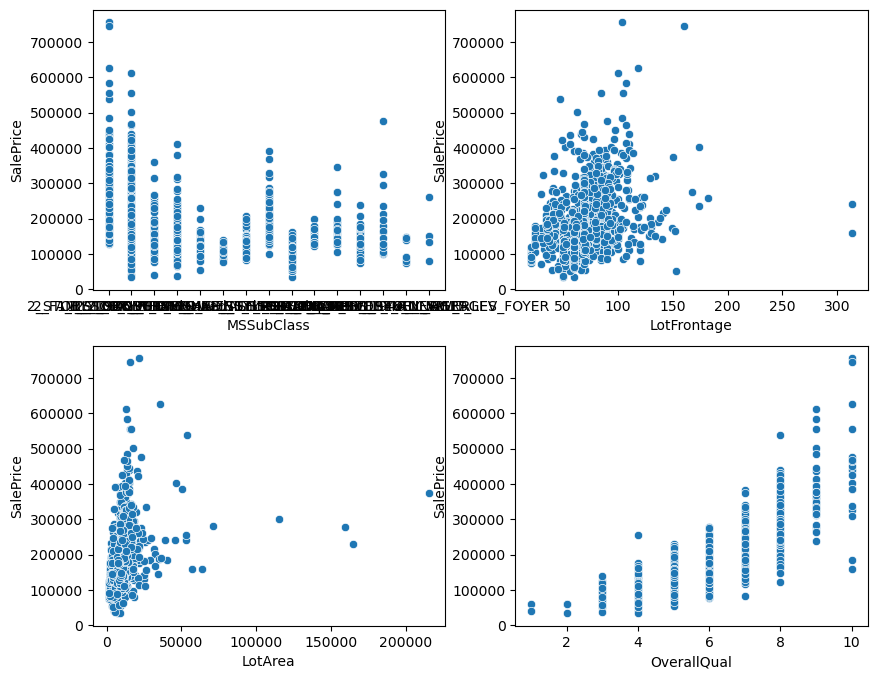

In [31]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
sns.scatterplot(x="MSSubClass", y="SalePrice", data=data)

plt.subplot(2,2,2)
sns.scatterplot(x="LotFrontage", y="SalePrice", data=data)

plt.subplot(2,2,3)
sns.scatterplot(x="LotArea", y="SalePrice", data=data)

plt.subplot(2,2,4)
sns.scatterplot(x="OverallQual", y="SalePrice", data=data)
plt.show()

In [32]:
# data["GrLivAreaSquared"] = data["GrLivArea"]*data["GrLivArea"]
# data["BsmtUnfSFSquared"] = data["BsmtUnfSF"]**2

In [33]:
# data["EnclosedPorchSquared"] = data["EnclosedPorch"]**2

In [34]:
# data["2ndFlrSFSquared"] = data["2ndFlrSF"]**2

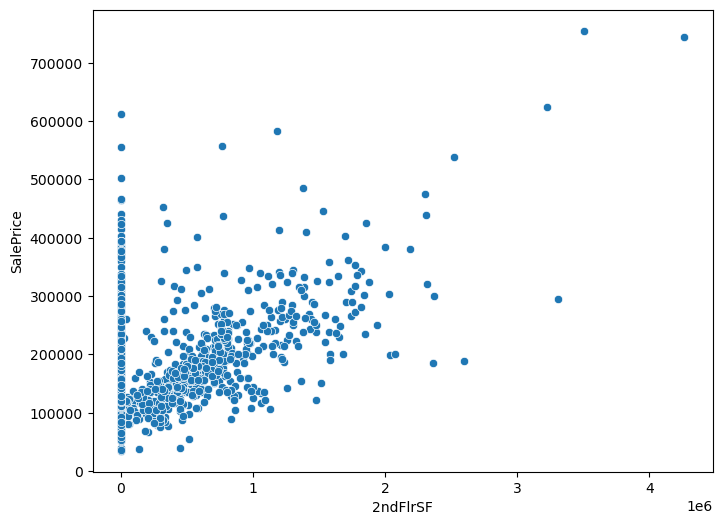

In [35]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=data["2ndFlrSF"]**2, y=data["SalePrice"], data=data)


plt.show()

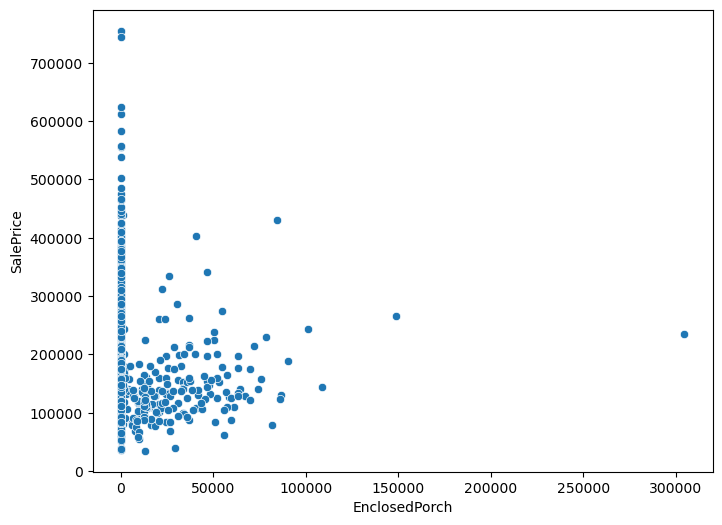

In [36]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=data["EnclosedPorch"]*data["EnclosedPorch"], y=data["SalePrice"], data=data)


plt.show()

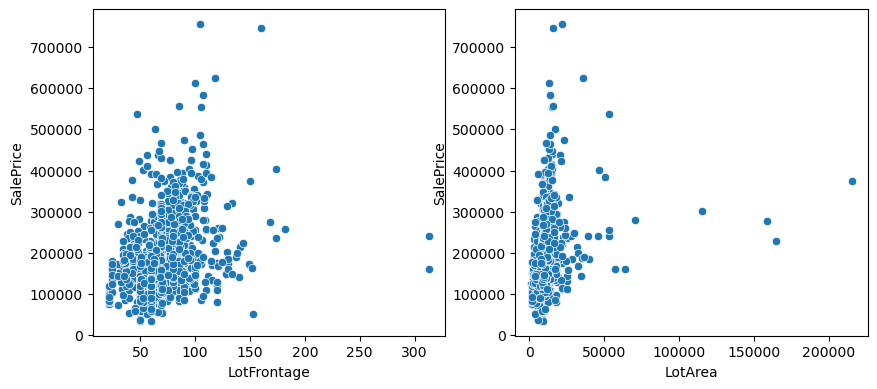

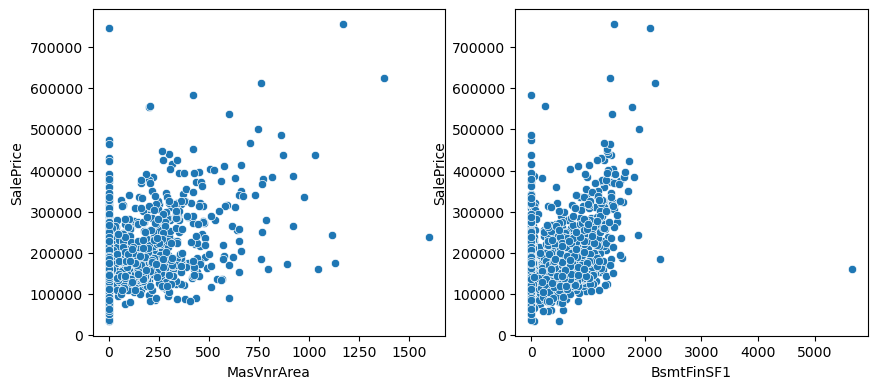

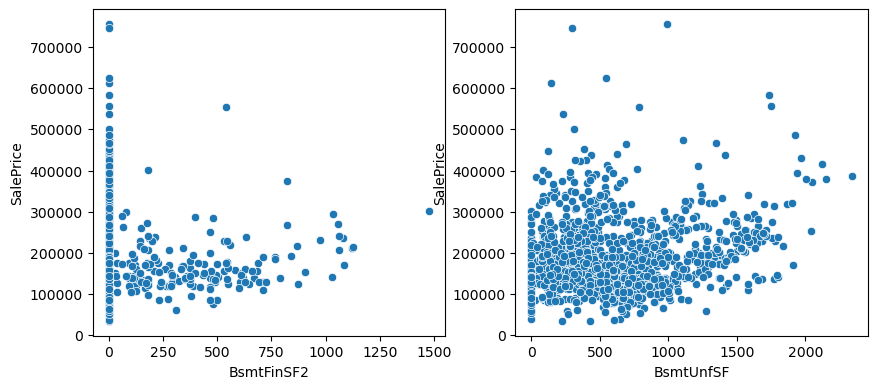

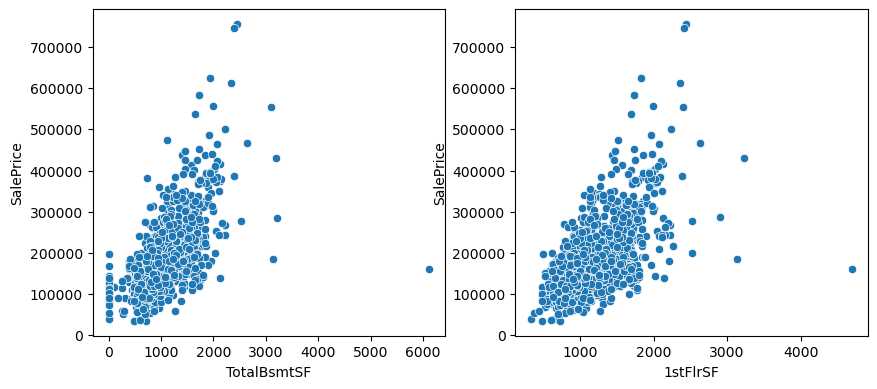

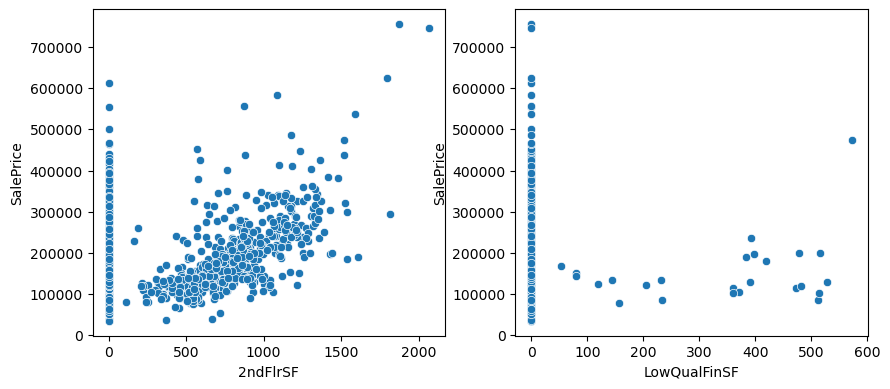

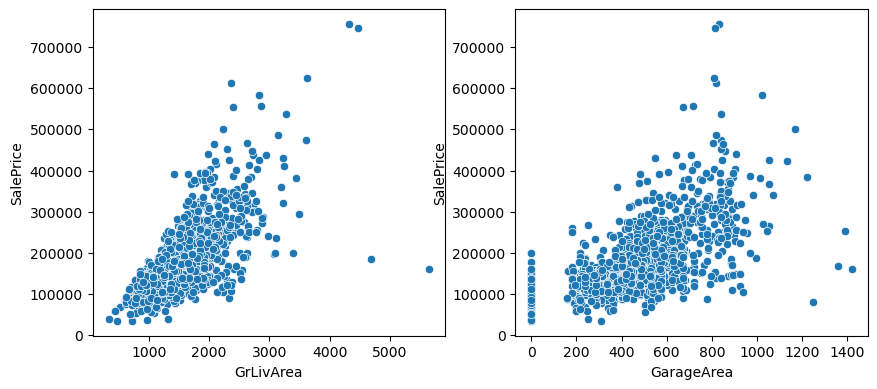

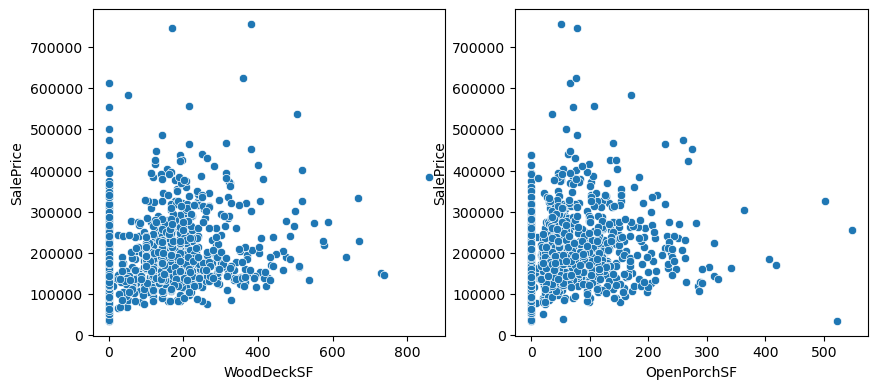

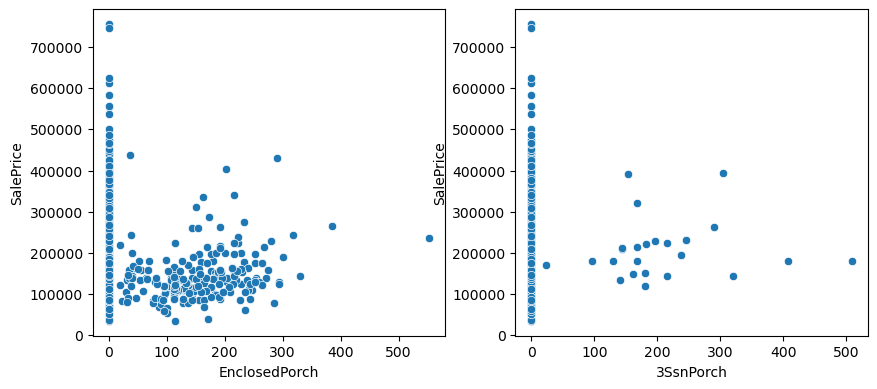

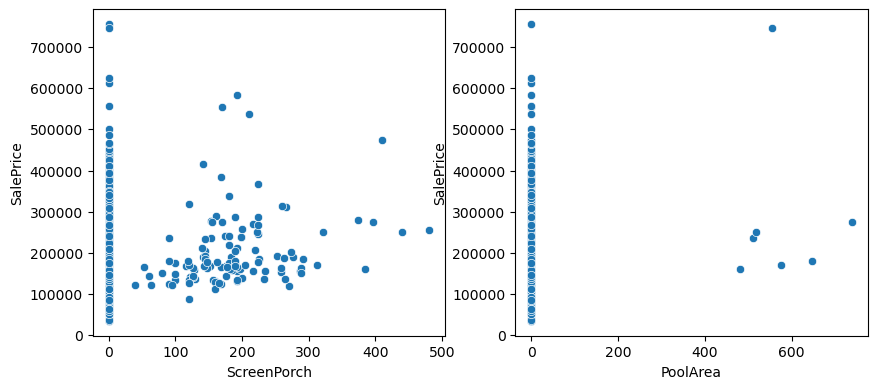

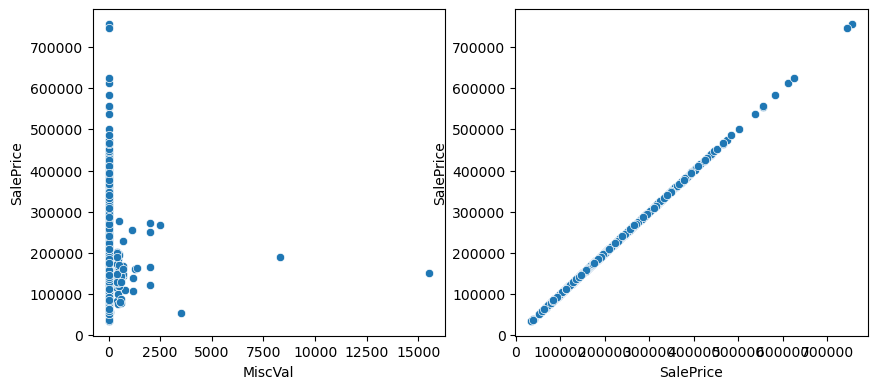

In [37]:

rows = math.ceil(len(data_con_cols)/2)

for i in range(0, len(data_con_cols), 2):
    plt.figure(figsize=(10, 50))
    plt.subplot(rows,2, i+1)
    sns.scatterplot(x=data_con_cols[i], y="SalePrice", data=data)

    plt.subplot(rows,2, i+2)
    sns.scatterplot(x=data_con_cols[i+1], y="SalePrice", data=data)
    
    plt.show()

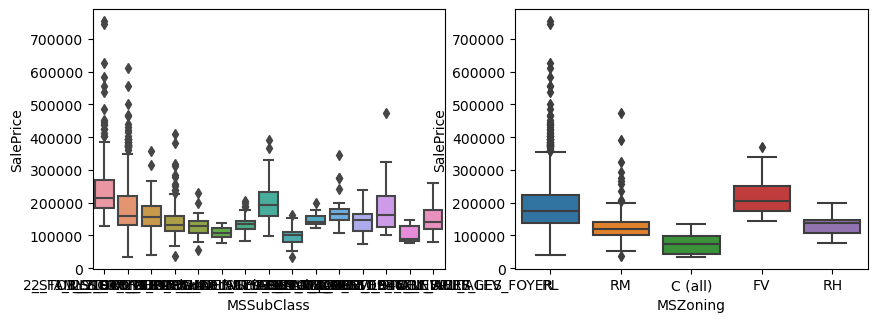

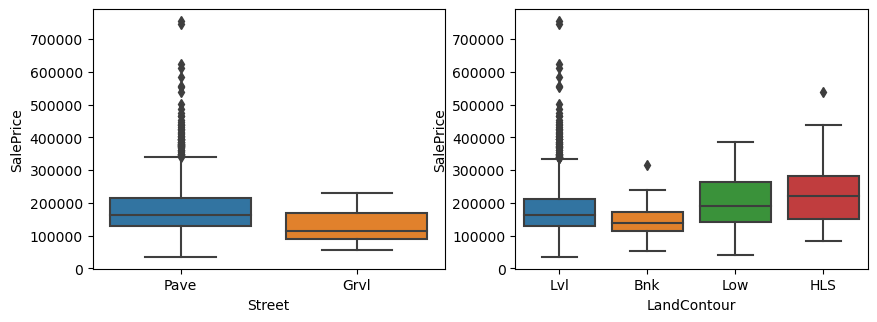

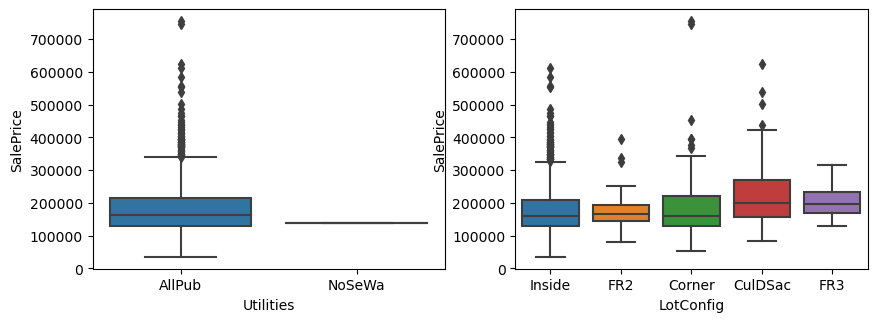

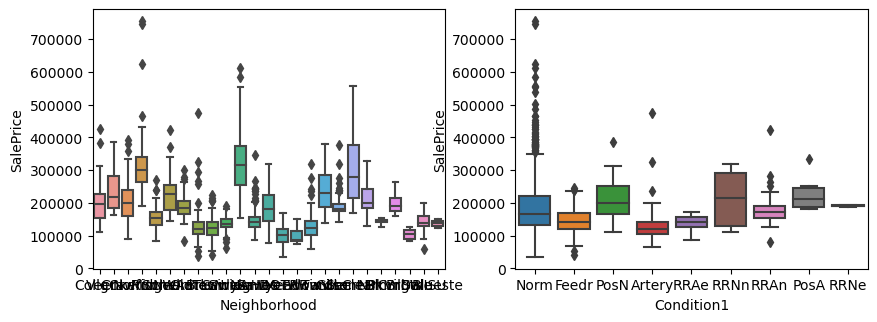

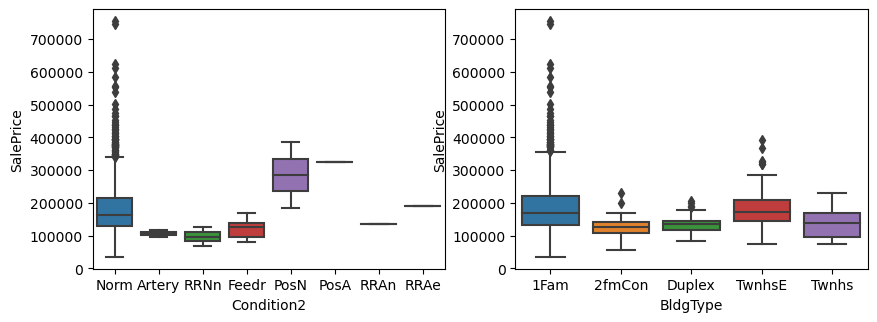

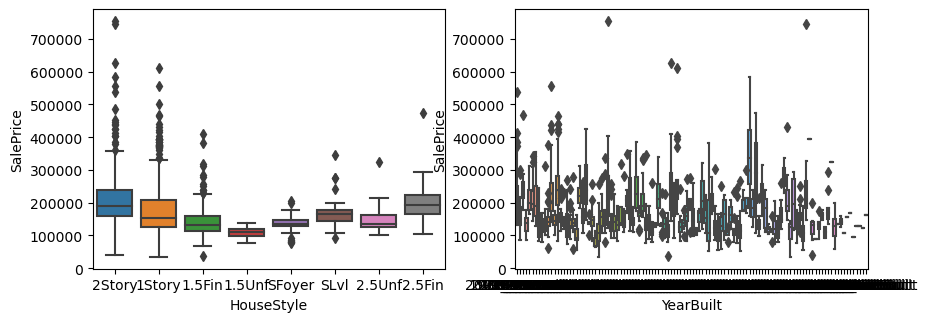

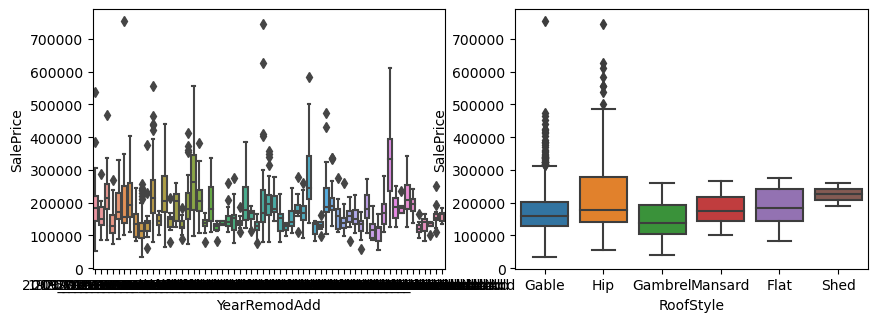

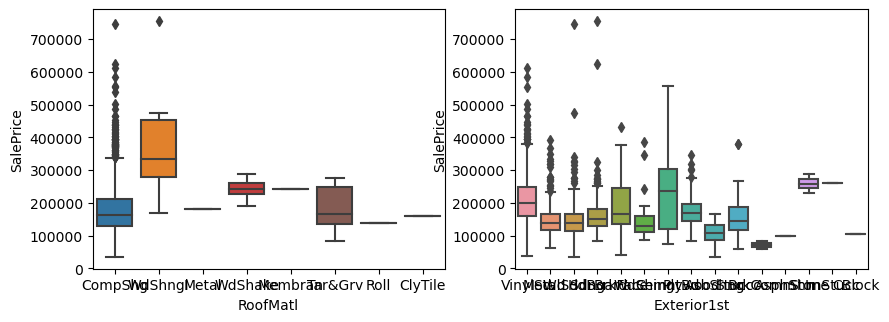

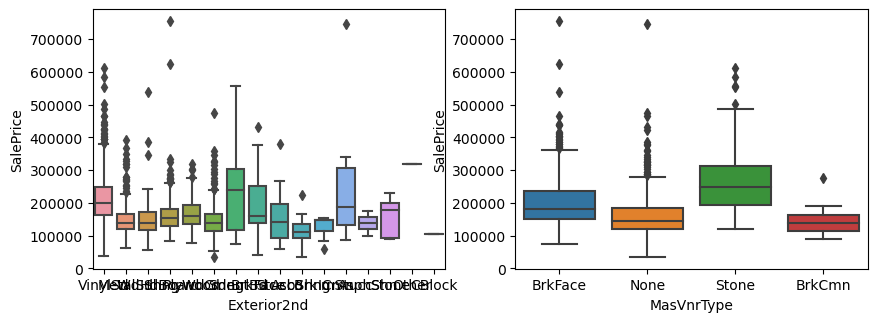

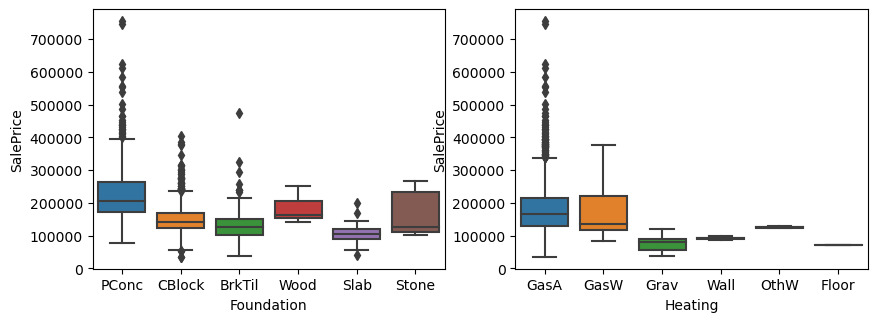

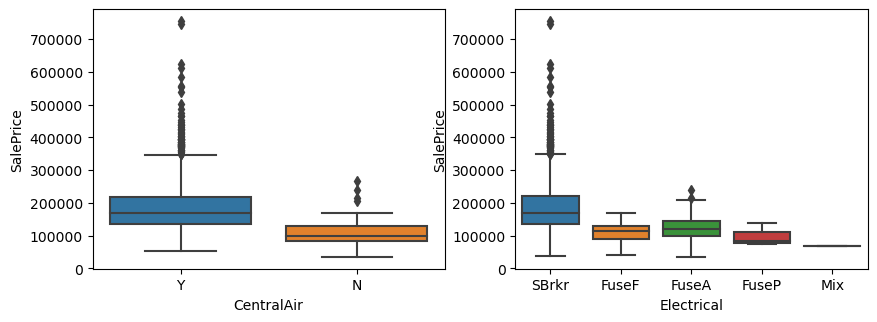

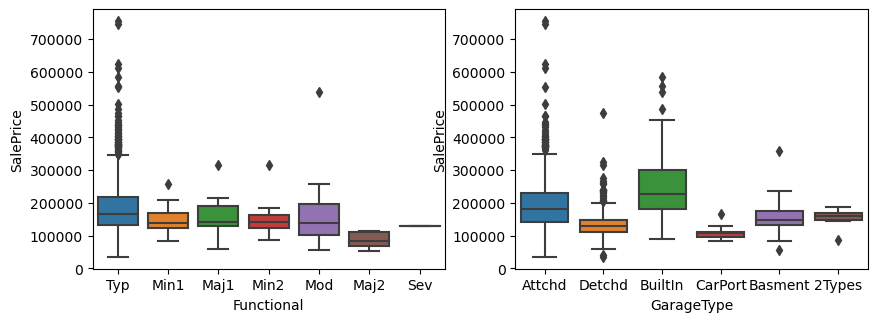

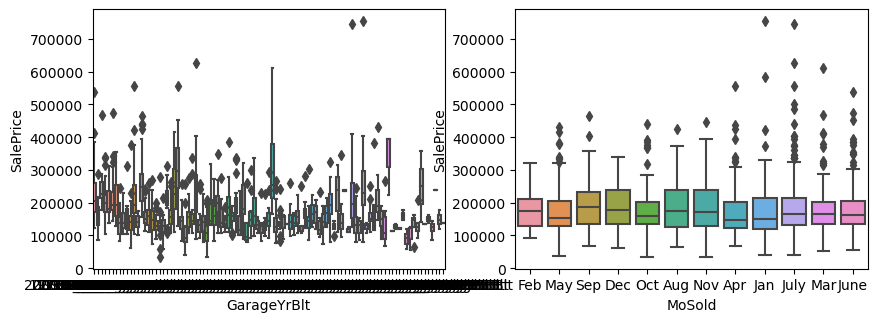

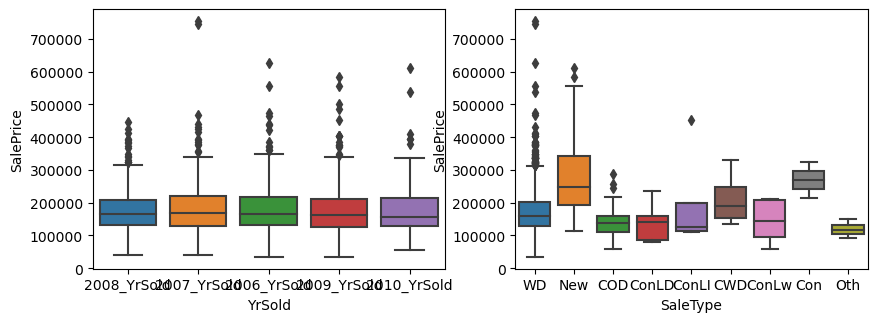

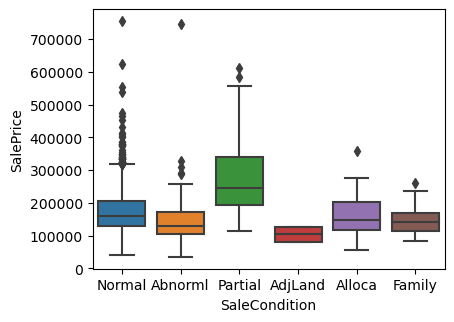

In [38]:

rows = math.ceil(len(data_dis_cols)/2)

for i in range(0, len(data_dis_cols), 2):
    if i == len(data_dis_cols)-1:
        plt.figure(figsize=(10, 60))
        plt.subplot(rows,2, i+1)
        sns.boxplot(x=data_dis_cols[i], y="SalePrice", data=data)

        plt.show()
    else:
        plt.figure(figsize=(10, 60))
        plt.subplot(rows,2, i+1)
        sns.boxplot(x=data_dis_cols[i], y="SalePrice", data=data)

        plt.subplot(rows,2, i+2)
        sns.boxplot(x=data_dis_cols[i+1], y="SalePrice", data=data)

        plt.show()

In [39]:
# Analysing Categorical Variables

binar_var, multi_var = [], []

for cat in data_dis_cols:
    if data[cat].nunique() == 2:
        binar_var.append(cat)
    else:
        multi_var.append(cat)
print(binar_var)
print(multi_var)

['Street', 'Utilities', 'CentralAir']
['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'GarageYrBlt', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [40]:
for b in binar_var:
    print(b, " ", data[b].unique())

Street   ['Pave' 'Grvl']
Utilities   ['AllPub' 'NoSeWa']
CentralAir   ['Y' 'N']


In [41]:
data["Street"] = data["Street"].map({"Pave": 0, "Grvl": 1})
data["Utilities"] = data["Utilities"].map({"AllPub": 0, "NoSeWa": 1})
data["CentralAir"] = data["CentralAir"].map({"Y": 0, "N": 1})

In [42]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2_STORY_1946_NEWER,RL,65.0,8450,0,Reg,Lvl,0,Inside,Gtl,...,0,0,0,0,0,Feb,2008_YrSold,WD,Normal,208500
1,1_STORY__STYLES,RL,80.0,9600,0,Reg,Lvl,0,FR2,Gtl,...,0,0,0,0,0,May,2007_YrSold,WD,Normal,181500
2,2_STORY_1946_NEWER,RL,68.0,11250,0,IR1,Lvl,0,Inside,Gtl,...,0,0,0,0,0,Sep,2008_YrSold,WD,Normal,223500
3,2_STORY_1945_OLDER,RL,60.0,9550,0,IR1,Lvl,0,Corner,Gtl,...,272,0,0,0,0,Feb,2006_YrSold,WD,Abnorml,140000
4,2_STORY_1946_NEWER,RL,84.0,14260,0,IR1,Lvl,0,FR2,Gtl,...,0,0,0,0,0,Dec,2008_YrSold,WD,Normal,250000


In [43]:
label_encoder = LabelEncoder()
for ord_v in ordinal_vars:
    data[ord_v] = label_encoder.fit_transform(data[ord_v])

In [44]:
print(multi_var)

['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'GarageYrBlt', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [45]:
for i in multi_var:
    print(data[i].value_counts())

1_STORY__STYLES                                     536
2_STORY_1946_NEWER                                  299
1_1_2_STORY_FINISHED_ALL_AGES                       144
1_STORY_PUD_Planned_Unit_Development_1946__NEWER     87
1_STORY_OLDER                                        69
2_STORY_PUD_1946_NEWER                               63
2_STORY_1945_OLDER                                   60
SPLIT_OR_MULTI_LEVEL                                 58
DUPLEX_ALL_STYLES_AND_AGES                           52
2_FAMILY_CONVERSION_ALL_STYLES_AND_AGES              30
SPLIT_FOYER                                          20
2_1_2_STORY_ALL_AGES                                 16
1_1_2 STORY_UNFINISHED_ALL_AGES                      12
PUD_MULTILEVEL_INCL_SPLIT_LEV_FOYER                  10
1_STORY_ALL_AGES                                      4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Lvl    1311
Bnk     

In [46]:
data[multi_var]

,MSSubClass,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,...,Foundation,Heating,Electrical,Functional,GarageType,GarageYrBlt,MoSold,YrSold,SaleType,SaleCondition
0,2_STORY_1946_NEWER,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,2003_YearBuilt,...,PConc,GasA,SBrkr,Typ,Attchd,2003.0_GarageYrBlt,Feb,2008_YrSold,WD,Normal
1,1_STORY__STYLES,RL,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,1976_YearBuilt,...,CBlock,GasA,SBrkr,Typ,Attchd,1976.0_GarageYrBlt,May,2007_YrSold,WD,Normal
2,2_STORY_1946_NEWER,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,2001_YearBuilt,...,PConc,GasA,SBrkr,Typ,Attchd,2001.0_GarageYrBlt,Sep,2008_YrSold,WD,Normal
3,2_STORY_1945_OLDER,RL,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,1915_YearBuilt,...,BrkTil,GasA,SBrkr,Typ,Detchd,1998.0_GarageYrBlt,Feb,2006_YrSold,WD,Abnorml
4,2_STORY_1946_NEWER,RL,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,2000_YearBuilt,...,PConc,GasA,SBrkr,Typ,Attchd,2000.0_GarageYrBlt,Dec,2008_YrSold,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2_STORY_1946_NEWER,RL,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,1999_YearBuilt,...,PConc,GasA,SBrkr,Typ,Attchd,1999.0_GarageYrBlt,Aug,2007_YrSold,WD,Normal
1456,1_STORY__STYLES,RL,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,1978_YearBuilt,...,CBlock,GasA,SBrkr,Min1,Attchd,1978.0_GarageYrBlt,Feb,2010_YrSold,WD,Normal
1457,2_STORY_1945_OLDER,RL,Lvl,Inside,Crawfor,Norm,Norm,1Fam,2Story,1941_YearBuilt,...,Stone,GasA,SBrkr,Typ,Attchd,1941.0_GarageYrBlt,May,2010_YrSold,WD,Normal
1458,1_STORY__STYLES,RL,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,1950_YearBuilt,...,CBlock,GasA,FuseA,Typ,Attchd,1950.0_GarageYrBlt,Apr,2010_YrSold,WD,Normal


In [47]:
for cat in multi_var:
    dummies = pd.get_dummies(data[cat], drop_first=True)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(columns=cat)

In [48]:
data.shape

(1460, 488)

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV

from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

Since there are more number of features, there is a heavy overfitting in all the cases

In [50]:
# Train an Test split


df_train, df_test = train_test_split(data, train_size=0.80, random_state=100)

In [51]:
transformation = MinMaxScaler()
print(data_con_cols)

df_train[data_con_cols] = transformation.fit_transform(df_train[data_con_cols])

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [52]:
df_train.head()

,LotFrontage,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
133,0.164384,0.025955,0,0,0,0,7,4,0.08500,2,...,0,0,0,0,1,0,0,0,1,0
290,0.339041,0.066891,0,3,0,0,7,4,0.00000,2,...,0,0,1,0,0,0,0,0,0,1
24,0.164384,0.032466,0,0,0,0,4,7,0.00000,3,...,0,0,0,0,1,0,0,0,1,0
1093,0.171233,0.037066,0,3,0,0,4,7,0.10375,3,...,0,0,0,0,1,0,0,0,1,0
1288,0.065068,0.020398,0,0,0,0,7,4,0.00000,2,...,0,0,0,0,1,0,0,0,1,0


In [53]:
# Getting dependent and independent variables

y_train = df_train.pop("SalePrice")
x_train = df_train.copy()

In [54]:
params = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
             20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

ridge = Ridge()

grid_ridge = GridSearchCV(
    estimator=ridge, 
    param_grid=params,
    cv=5, 
    return_train_score=True,
    verbose=1)
grid_ridge.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8,
                                   9, 10, 20, 30, 40, 50, 60, 70, 80, 90, ...]},
             return_train_score=True, verbose=1)

In [55]:
print(grid_ridge.best_estimator_)
print(grid_ridge.best_params_["alpha"])

ridge_alpha = grid_ridge.best_params_["alpha"]
print(ridge_alpha)

Ridge(alpha=20)
20
20


In [56]:
lasso = Lasso()

grid_lasso = GridSearchCV(
    estimator=lasso, 
    param_grid=params,
    scoring="r2",
    cv=5, 
    return_train_score=True,
    verbose=1)
grid_lasso.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8,
                                   9, 10, 20, 30, 40, 50, 60, 70, 80, 90, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [57]:
print(grid_lasso.best_estimator_)
print(grid_lasso.best_params_)
lasso_alpha = grid_lasso.best_params_["alpha"]
print(lasso_alpha)

Lasso(alpha=0.0001)
{'alpha': 0.0001}
0.0001


In [58]:
print(x_train.shape)
print(y_train.shape)

(1168, 487)
(1168,)


In [59]:
df_test[data_con_cols] = transformation.transform(df_test[data_con_cols])
y_test = df_test.pop("SalePrice")
x_test = df_test.copy()

#  Ridge Regression

In [60]:
ridge_regression = Ridge(alpha=ridge_alpha)
# y_train = np.log(y_train)
ridge_regression.fit(x_train, y_train)

Ridge(alpha=20)

In [61]:
y_pred_ridge = ridge_regression.predict(x_train)

In [62]:
y_pred_ridge

array([0.30126147, 0.29167895, 0.17215129, ..., 0.35945997, 0.09873023,
       0.3543674 ])

In [63]:
r2_score(y_true=y_train, y_pred=y_pred_ridge)

0.8717468970385598

In [64]:
error_ridge = y_train - y_pred_ridge

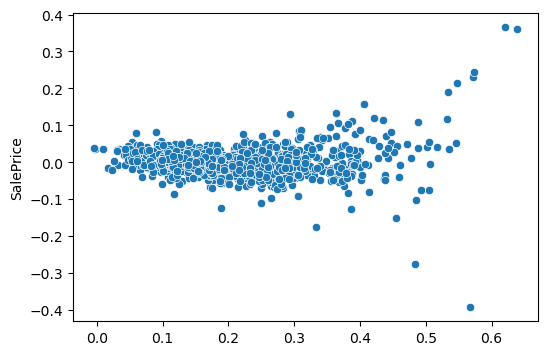

In [65]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_ridge, y=error_ridge)
plt.show()

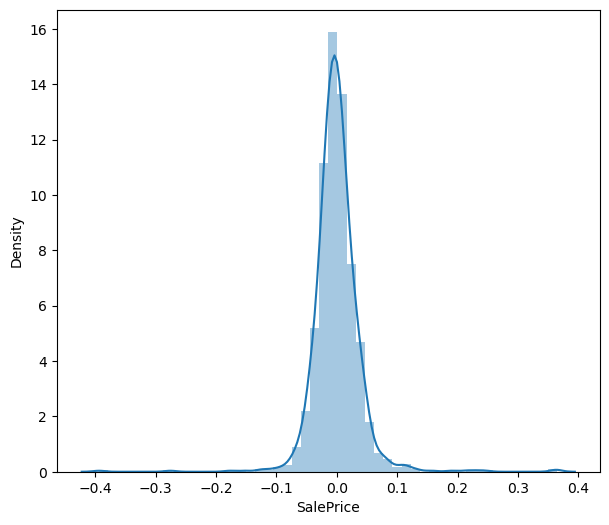

In [66]:
plt.figure(figsize=(7, 6))
sns.distplot(error_ridge)
plt.show()

In [67]:
y_test_pred_ridge = ridge_regression.predict(x_test)
r2_score(y_true=y_test, y_pred=y_test_pred_ridge)

0.8705921937039763

In [68]:
rcols = x_train.columns[ridge_regression.coef_ != 0].to_list()
rvalues = ridge_regression.coef_[ridge_regression.coef_ != 0]
print(rcols)
print(rvalues)

['LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', '1_1_2_STORY_FINISHED_ALL_AGES', '1_STORY_ALL_AGES', '1_STORY_OLDER', '1_STORY_PUD_Planned_Unit_Development_1946__NEWER', '1_STORY__STYLES', '2_1_2_STORY_ALL_AGES', '2_FAMILY_CONVERSION_ALL_STYLES_AND_AGES', '2_STORY_1945_OLDER', '2_STORY_1946_NEWER', '2_STORY_PUD_1946_NEWER', 'DUPLEX_ALL_STYLES_AND_AGES', 'PUD_MULTILEVEL_INCL_SP

In [69]:
ridge_coef = pd.DataFrame({
    'Col': rcols,
    'Values': rvalues
})
ridge_coef.sort_values(by=["Values"], inplace=True, ascending=False)

In [70]:
ridge_coef.head()

,Col,Values
87,NoRidge,0.038949
25,GrLivArea,0.026017
23,2ndFlrSF,0.025888
8,MasVnrArea,0.025329
88,NridgHt,0.024685


# Lasso Regression

In [71]:
lasso_regression = Lasso(alpha=lasso_alpha)
lasso_regression.fit(x_train, y_train)
y_pred_lasso = lasso_regression.predict(x_train)
print(r2_score(y_true=y_train, y_pred=y_pred_lasso))

0.8946599135773663


In [72]:
print(lasso_alpha)

0.0001


In [73]:
error_l = y_train - y_pred_lasso

In [74]:
error_l.size

1168

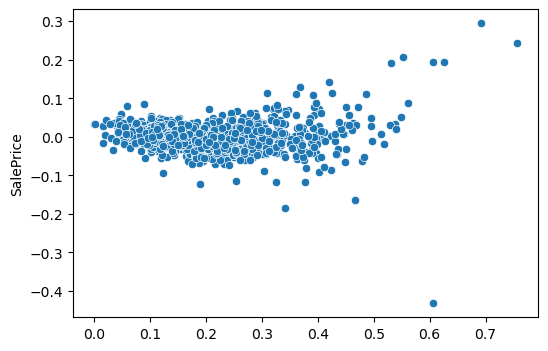

In [75]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_lasso, y=error_l)
plt.show()

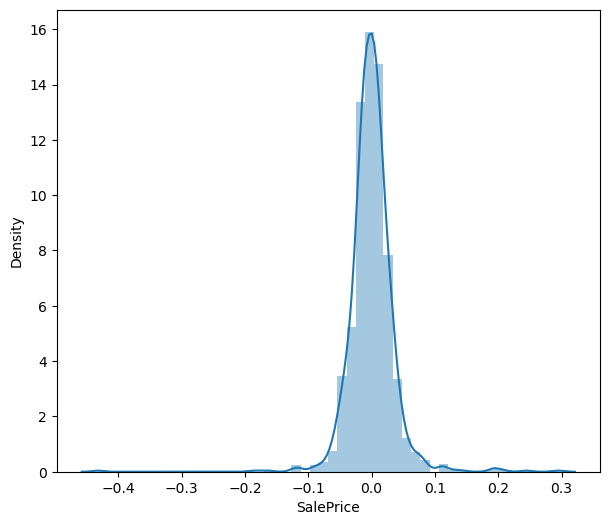

In [76]:
plt.figure(figsize=(7, 6))
sns.distplot(error_l)
plt.show()

In [77]:
y_test_pred_lasso = lasso_regression.predict(x_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.8738720260506958


In [78]:
cols = x_train.columns[lasso_regression.coef_ != 0].to_list()
values = lasso_regression.coef_[lasso_regression.coef_ != 0]
print(cols)
print(values)

['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', '1_1_2_STORY_FINISHED_ALL_AGES', '1_STORY_PUD_Planned_Unit_Development_1946__NEWER', '1_STORY__STYLES', '2_STORY_PUD_1946_NEWER', 'SPLIT_OR_MULTI_LEVEL', 'RL', 'HLS', 'Low', 'Lvl', 'CulDSac', 'FR2', 'Inside', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'Somerst', 'StoneBr', 'Veenker', 'Feedr', 'Norm', 'RRAn', 'PosN', '2fmCon', 'Twnhs', 'TwnhsE', '1.5Unf', '1Story', '2.

In [79]:
lasso_coef = pd.DataFrame({
    'Col': cols,
    'Values': values
})
lasso_coef.sort_values(by=["Values"], inplace=True, ascending=False)

In [80]:
top_five_predictors_lasso = lasso_coef.head()["Col"].to_list()
print(top_five_predictors_lasso)

['GrLivArea', 'WdShngl', 'MasVnrArea', 'NoRidge', 'NridgHt']


# Doubling the alpha

In [81]:
double_ridge_alpha = ridge_alpha * 2
ridge_regression = Ridge(alpha=double_ridge_alpha)
# y_train = np.log(y_train)
ridge_regression.fit(x_train, y_train)
y_pred_ridge = ridge_regression.predict(x_train)

In [82]:
r2_score(y_true=y_train, y_pred=y_pred_ridge)

0.8579568010426186

In [83]:
error_ridge = y_train - y_pred_ridge

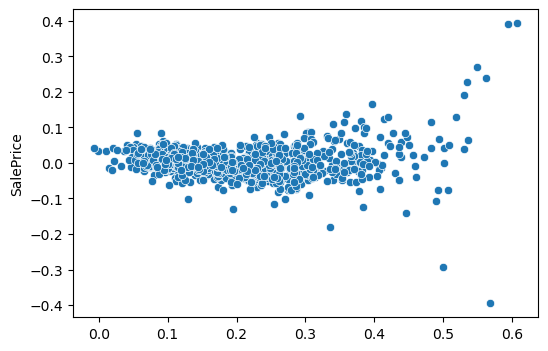

In [84]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_ridge, y=error_ridge)
plt.show()

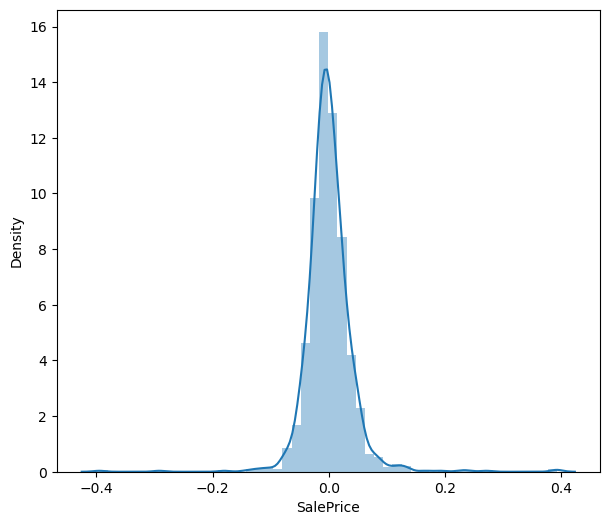

In [85]:
plt.figure(figsize=(7, 6))
sns.distplot(error_ridge)
plt.show()

In [86]:
y_test_pred_ridge = ridge_regression.predict(x_test)
r2_score(y_true=y_test, y_pred=y_test_pred_ridge)

0.8661785791121286

In [87]:
lasso_regression_1 = Lasso(alpha=lasso_alpha*2)
lasso_regression_1.fit(x_train, y_train)
y_pred_lasso_1 = lasso_regression_1.predict(x_train)
print(r2_score(y_true=y_train, y_pred=y_pred_lasso_1))

0.8771322406696112


In [88]:
error_l1 = y_train - y_pred_lasso_1

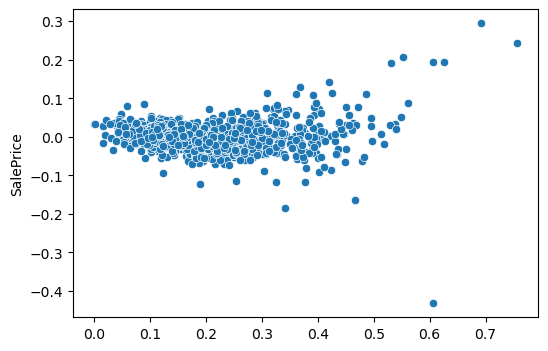

In [89]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_lasso, y=error_l)
plt.show()

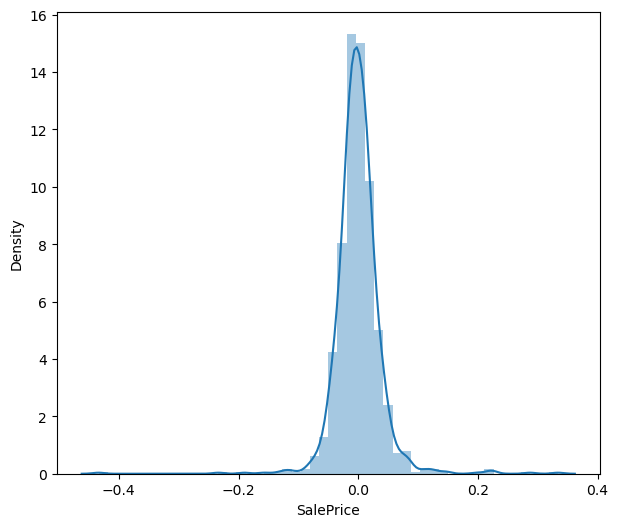

In [90]:
plt.figure(figsize=(7, 6))
sns.distplot(error_l1)
plt.show()

In [91]:
y_test_pred_lasso_1 = lasso_regression_1.predict(x_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_lasso_1))

0.8826310463889293


# Model by dropping above top 5 predictors

In [92]:
x_train_2 = x_train.drop(columns=top_five_predictors_lasso)
x_test_2 = x_test.drop(columns=top_five_predictors_lasso)

In [93]:
lasso = Lasso()

grid_lasso = GridSearchCV(
    estimator=lasso, 
    param_grid=params,
    scoring="r2",
    cv=5, 
    return_train_score=True,
    verbose=1)
grid_lasso.fit(x_train_2, y_train)

print(grid_lasso.best_estimator_)
print(grid_lasso.best_params_)
lasso_alpha = grid_lasso.best_params_["alpha"]
print(lasso_alpha)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Lasso(alpha=0.0001)
{'alpha': 0.0001}
0.0001


In [94]:
lasso_regression_1 = Lasso(alpha=lasso_alpha)
lasso_regression_1.fit(x_train_2, y_train)
y_pred_lasso_1 = lasso_regression_1.predict(x_train_2)
print(r2_score(y_true=y_train, y_pred=y_pred_lasso_1))

0.8836397033997379


In [95]:
error_l1 = y_train - y_pred_lasso_1

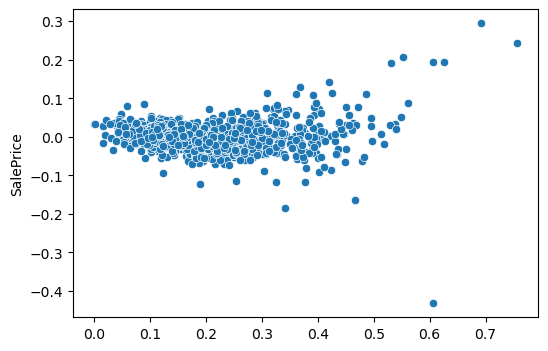

In [96]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_lasso, y=error_l)
plt.show()

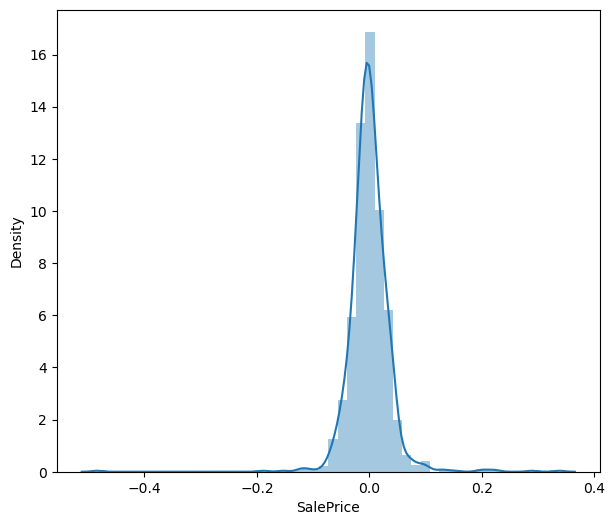

In [97]:
plt.figure(figsize=(7, 6))
sns.distplot(error_l1)
plt.show()

In [98]:
y_test_pred_lasso_1 = lasso_regression_1.predict(x_test_2)
print(r2_score(y_true=y_test, y_pred=y_test_pred_lasso_1))

0.8559667080678955


In [99]:
cols = x_train_2.columns[lasso_regression_1.coef_ != 0].to_list()
values = lasso_regression_1.coef_[lasso_regression_1.coef_ != 0]
print(cols)
print(values)

['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', '1_1_2_STORY_FINISHED_ALL_AGES', '1_STORY_PUD_Planned_Unit_Development_1946__NEWER', '1_STORY__STYLES', '2_STORY_1945_OLDER', '2_STORY_1946_NEWER', '2_STORY_PUD_1946_NEWER', 'SPLIT_OR_MULTI_LEVEL', 'RL', 'HLS', 'Low', 'Lvl', 'CulDSac', 'FR2', 'Inside', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'StoneBr', 'Timber', 'Feedr', 'Norm', 'RRAn', 'PosN', '2fmCon', 'Twnhs', 'TwnhsE', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story',

In [100]:
lasso_coef = pd.DataFrame({
    'Col': cols,
    'Values': values
})
lasso_coef.sort_values(by=["Values"], inplace=True, ascending=False)

In [101]:
lasso_coef.head()

,Col,Values
16,1stFlrSF,0.258607
17,2ndFlrSF,0.161302
105,2010_YearRemodAdd,0.048866
152,2009.0_GarageYrBlt,0.035996
1,LotArea,0.032237
